Ikiden fazla sinif varsa bu multi-class classification a girer.
Bu ornekte fashion mnist datasini kullancagiz.
(https://github.com/zalandoresearch/fashion-mnist)


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#bu data halihazirda trainning ve test kumelerine ayrilmis durumda
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


ornek olarak verimize bakalim

In [2]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
#shapemiza bakalim
train_data[0].shape

(28, 28)

In [5]:
train_labels[0].shape

()

labelimiz skaler oldugu icin bos dondu

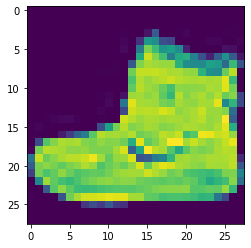

In [7]:
#ornegimizin sayisal degerlerini degilde direkt kendinsine baklaim
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

ilk verimiz bir ayakkabi ldugunu anladik simdide labelina bakalim

In [8]:
train_labels[0]

9

labelimiz 9 peki neyi ifade ediyor github sayfasindan bakabiliriz kolay olsundu diye buraya yazdim

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot


In [10]:
#labellari liste seklinde yazalim anlasilmasi kolay olsun
class_names = ["T-shirt/top",	"Trouser",	"Pullover",	"Dress",	"Coat",	"Sandal","Shirt","Sneaker",	"Bag","Ankle boot"]

Text(0.5, 1.0, 'Sneaker')

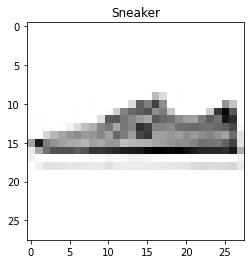

In [16]:
#tekrar bir ornege goz atalim
plt.imshow(train_data[14], cmap=plt.cm.binary)
plt.title(class_names[train_labels[14]])

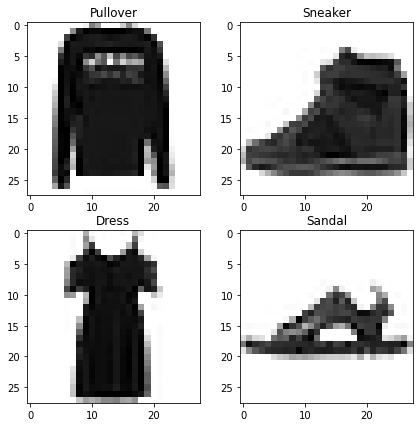

In [18]:
#random birkac tane ornege goz atalim
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax =plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

## Building a Multi-Class Classification Model

Ikili siniflandirmaya yakin bir mimari kullanabiliriz.

input shape = 28x28 (fotograflarin boyutu)
output shape = 10 (her sinif icin birer)
loss function = CategoricalCrossentropy
output layer activation = softmax


In [19]:
train_data[0].shape

(28, 28)

In [20]:
len(class_names)

10

Modeli hazirlayalim

In [33]:
#create the model
model_1 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape= (28, 28)), #flatten layer ne yaptigina ufak bir arastirma ile bakalim
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
    ])

#compile the model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),#Sparce seklinde kullanmamizin sebei labellarimiz one hot seklinde degilse ullaniriz biraz arastiralim bunuda
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

#fit the model
history= model_1.fit(train_data,
                     train_labels,
                     epochs= 10,
                     validation_data= (test_data,test_labels) #ayri bir validation kumemiz yok o yuzden boyle kalabilir
                     )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0861 - accuracy: 0.2115 - val_loss: 1.6647 - val_accuracy: 0.2985
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5309 - accuracy: 0.3630 - val_loss: 1.4182 - val_accuracy: 0.4069
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4013 - accuracy: 0.4119 - val_loss: 1.3576 - val_accuracy: 0.4297
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3667 - accuracy: 0.4212 - val_loss: 1.3344 - val_accuracy: 0.4350
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3409 - accuracy: 0.4295 - val_loss: 1.3352 - val_accuracy: 0.4321
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3263 - accuracy: 0.4342 - val_loss: 1.3122 - val_accuracy: 0.4450
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3094 - accuracy: 0.4378 - val_loss: 1.3570 - val_accuracy:

labellarimiz one hot tanimlamasi seklinde olmadigi icin SparseCategoricalCrossEntrop kullandik su sekilde de yapabilirdik.
Once verimizi one hot temsili icin duzenleyelim

In [34]:
#create the model
model_1 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape= (28, 28)), #flatten layer ne yaptigina ufak bir arastirma ile bakalim
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
    ])

#compile the model

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

#fit the model
history= model_1.fit(train_data,
                     tf.one_hot(train_labels,depth=10),#burasi ve test labels kismi
                     epochs= 10,
                     validation_data= (test_data,tf.one_hot(test_labels, depth=10)) 
                     )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3351 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1012 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy:

In [27]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [28]:
train_data.min() ,train_data.max()

(0, 255)

Verimiz 0 ile 255 arasinda bunu 0-1 arasina skistirmamiz modelimiz icin daha iy olcaktir. Normalization denir. bunu tanimini ve acklamasini yazarim buraya veya link

In [30]:
train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0 

train_data_norm.min() ,train_data_norm.max()

(0.0, 1.0)

Verimiz hazir ayni modeli tekrar deneyelim

In [32]:
#create the model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape= (28, 28)), #flatten layer ne yaptigina ufak bir arastirma ile bakalim
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
    ])

#compile the model

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

#fit the model
history_2= model_2.fit(train_data_norm,
                     tf.one_hot(train_labels,depth=10),#burasi ve test labels kismi
                     epochs= 10,
                     validation_data= (test_data_norm,tf.one_hot(test_labels, depth=10)) 
                     )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4637 - accuracy: 0.4397 - val_loss: 1.2097 - val_accuracy: 0.5272
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0980 - accuracy: 0.5734 - val_loss: 1.0118 - val_accuracy: 0.6236
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9387 - accuracy: 0.6364 - val_loss: 0.9250 - val_accuracy: 0.6528
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8673 - accuracy: 0.6607 - val_loss: 0.8676 - val_accuracy: 0.6710
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8202 - accuracy: 0.6969 - val_loss: 0.8109 - val_accuracy: 0.7067
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7778 - accuracy: 0.7175 - val_loss: 0.8080 - val_accuracy: 0.7002
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7501 - accuracy: 0.7248 - val_loss: 0.7760 - val_accuracy:

goruldugu gibi modelimiz guzel bir sekilde daha iyi sonuc verdi

sonuclari cizdirerek bakalkim

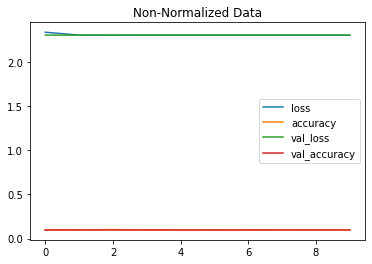

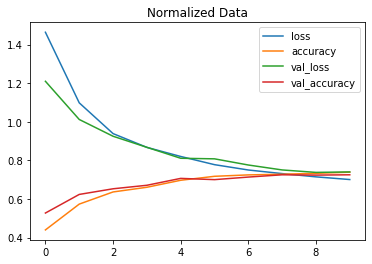

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(title= "Non-Normalized Data")


pd.DataFrame(history_2.history).plot(title= "Normalized Data")

Goruldugu gibi sadece verimiza normalization uygulamamiza ragmen ayni mimariye sahip 2 model farkli veriler ile farkli sonuclar verebiliyor. Modelimiz ciddi manada daha iyi sonuc vermis oldu.

## Ideal Learning rate

Uygun Learning rate ile modelimiz ne kadar gelisecek buna bakalim.

In [38]:
#create the model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape= (28, 28)), #flatten layer ne yaptigina ufak bir arastirma ile bakalim
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
    ])

#compile the model

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

#learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
history_3= model_3.fit(train_data_norm,
                     tf.one_hot(train_labels,depth=10),#burasi ve test labels kismi
                     epochs= 40,
                     validation_data= (test_data_norm,tf.one_hot(test_labels, depth=10)),
                     callbacks= [lr_scheduler] 
                     )

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8392 - accuracy: 0.2593 - val_loss: 1.3865 - val_accuracy: 0.4493
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0761 - accuracy: 0.5958 - val_loss: 0.9445 - val_accuracy: 0.6299
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8557 - accuracy: 0.6758 - val_loss: 0.8262 - val_accuracy: 0.6865
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7834 - accuracy: 0.6973 - val_loss: 0.7871 - val_accuracy: 0.7010
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7592 - accuracy: 0.7053 - val_loss: 0.7743 - val_accuracy: 0.6993
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7439 - accuracy: 0.7106 - val_loss: 0.7624 - val_accuracy: 0.7121
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7374 - accuracy: 0.7186 - val_loss: 0.8051 - val_accuracy:

Text(0, 0.5, 'Loss')

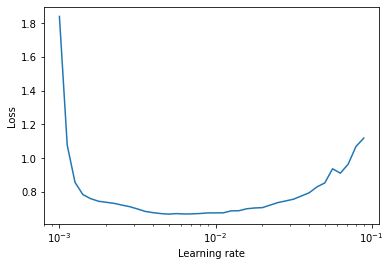

In [39]:
import numpy as np

lrs = 1e-3* (10**(tf.range(40)/20))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

Ideal learning rate icin bu grafigimizde; loss degerinin sert bir sekilde dustugu yerin en dusuk seviyesini almamiz mantikli bir tercih olur.

In [40]:
#yani bizim icin
10**-3 

0.001

In [41]:
#create the model
model_4 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape= (28, 28)), 
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
    ])

#compile the model

model_4.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics= ["accuracy"])

#fit the model
history_4= model_4.fit(train_data_norm,
                     tf.one_hot(train_labels,depth=10),#burasi ve test labels kismi
                     epochs= 20,
                     validation_data= (test_data_norm,tf.one_hot(test_labels, depth=10)),
                     )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2845 - accuracy: 0.5088 - val_loss: 1.0510 - val_accuracy: 0.6014
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9734 - accuracy: 0.6036 - val_loss: 0.9351 - val_accuracy: 0.6051
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8958 - accuracy: 0.6173 - val_loss: 0.8873 - val_accuracy: 0.6200
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8536 - accuracy: 0.6342 - val_loss: 0.8442 - val_accuracy: 0.6385
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8177 - accuracy: 0.6518 - val_loss: 0.8114 - val_accuracy: 0.6655
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7715 - accuracy: 0.6697 - val_loss: 0.7977 - val_accuracy: 0.6523
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7495 - accuracy: 0.6832 - val_loss: 0.7592 - val_accuracy:

## Evaluateing The Model

Confusion Matrix

Bunun hakkinda makaleler ile ne olduguna bakilmalidir

In [42]:
#kod confusion matrix olusturmak icin sklearn sitesinden alinmistir
#icerigi incelenebilir
 # Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [44]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
#biraz tahmin yapalim 
y_probs = model_3.predict(test_data_norm) 

# ilk 5 tahmine bakalim
y_probs[:5]

array([[0.0000000e+00, 3.4978276e-15, 0.0000000e+00, 2.4411150e-29,
        0.0000000e+00, 1.3884382e-02, 0.0000000e+00, 4.1787708e-01,
        1.3942138e-23, 5.6823856e-01],
       [3.2051567e-03, 8.3559723e-07, 2.3502274e-01, 2.7066991e-03,
        3.7157711e-01, 4.2915838e-03, 1.9125985e-01, 1.7427913e-03,
        1.9019324e-01, 7.7052299e-08],
       [1.1310215e-02, 6.0217935e-01, 7.4139815e-03, 3.2018468e-01,
        1.3793829e-02, 3.0897005e-02, 1.3589384e-02, 4.6076158e-05,
        5.8471382e-04, 7.6671279e-07],
       [1.1310215e-02, 6.0217935e-01, 7.4139815e-03, 3.2018468e-01,
        1.3793829e-02, 3.0897005e-02, 1.3589384e-02, 4.6076158e-05,
        5.8471382e-04, 7.6671279e-07],
       [5.0848675e-01, 5.1394939e-02, 5.2045520e-02, 1.5971637e-01,
        3.6675625e-02, 6.8582303e-04, 1.9085659e-01, 7.0279521e-07,
        1.3765287e-04, 8.3130356e-09]], dtype=float32)

In [47]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([0.0000000e+00, 3.4978276e-15, 0.0000000e+00, 2.4411150e-29,
        0.0000000e+00, 1.3884382e-02, 0.0000000e+00, 4.1787708e-01,
        1.3942138e-23, 5.6823856e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [48]:
# tahminleri int degerlerine cevirelim
y_preds = y_probs.argmax(axis=1)

# ilk 10 tahminin labellarina bakalim
y_preds[:10]

array([9, 4, 1, 1, 0, 1, 0, 6, 5, 7])

In [49]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [50]:
#confusion matrixe bir goz atalim
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[847,  39,   0,  65,   6,   0,  37,   0,   6,   0],
       [ 15, 962,   0,  14,   2,   0,   7,   0,   0,   0],
       [ 60,  24,   0, 107, 120,   0, 683,   0,   6,   0],
       [112, 642,   0, 164,   7,   2,  71,   0,   2,   0],
       [ 15,  13,   0,  92, 262,   0, 608,   0,  10,   0],
       [  2,  10,   0,   5,   3, 759,   2, 169,   0,  50],
       [315,  23,   0, 104,  58,   0, 493,   0,   7,   0],
       [  0,   0,   0,   0,   0,  14,   0, 909,   0,  77],
       [ 11,   1,   0,  13, 137,   5,  45,  11, 775,   2],
       [  3,   0,   0,   0,   0,  18,   0,  55,   1, 923]])

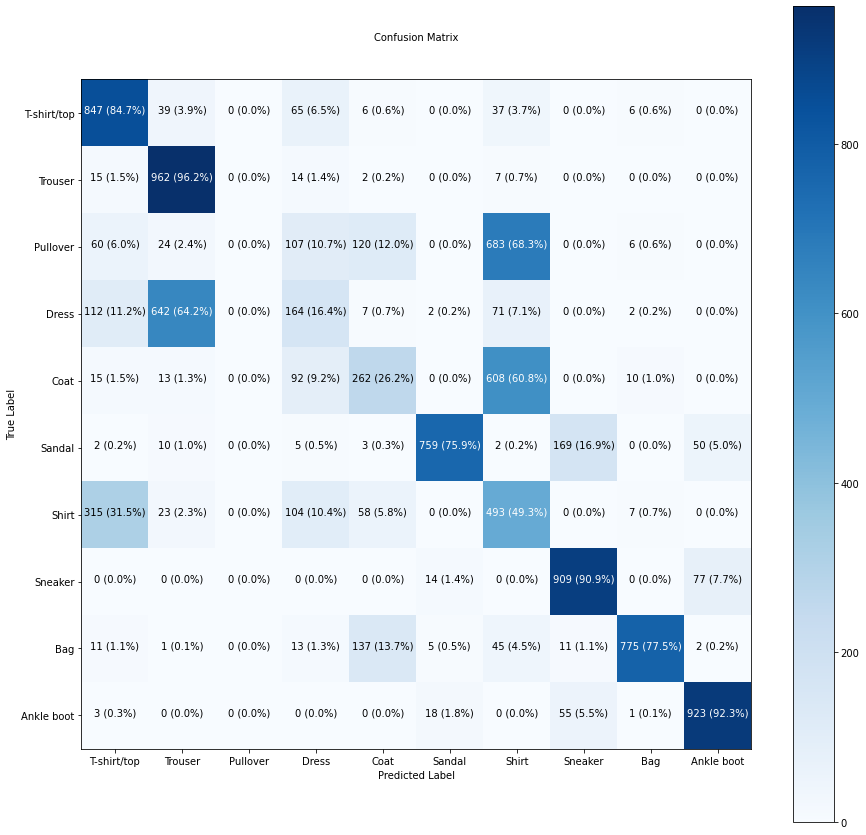

In [51]:
#yazdigimiz fonksiyon ile daha iyi bir gorunumde bakalim
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Confusion matrixi inceleyelek modelimizin hangi tahminler yaparken zorlandigini o tahmini ne ie karistirdigini anlayabiliriz. Confusion matrixi daha iyi anlayabilmke icin --buraya bi link birakalim--.

In [52]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  rastgele bir fotograf secelim,tahminde bulunduralim ve dogru labelai gorelim
  """
  # rasgele bir sayi secelim
  i = random.randint(0, len(images))

  # tahminleri olusturmak icin
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # goruntuye bakalim
  plt.imshow(target_image, cmap=plt.cm.binary)

  #labeli tahmin dogruysa yesil yanlis ise kirmizi yazdiralim
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # tahminler labellari ayarlayalim
  plt.xlabel("Prediction: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) 

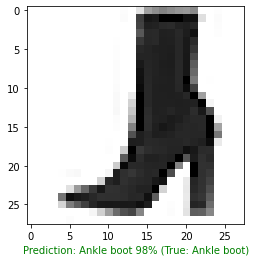

In [54]:
#fonsiyonumuzu deneyelim
plot_random_image(model=model_3,
                  images=test_data_norm,  
                  true_labels=test_labels,
                  classes=class_names)

### Modelimizi biraz daha detayli inceleyelim

In [55]:
model_3.layers

In [57]:
#spesifik bir katmana bakalim
model_3.layers[1]

In [61]:
#agirlik ve bias degerlerine bakalim
weigths, biases = model_3.layers[1].get_weights()
weigths, biases ,weigths.shape

(array([[ 6.3486218e-02, -1.3189509e+01,  2.8492936e-01, -3.4592163e-02],
        [ 2.2522541e+01, -2.1441399e+01,  2.0036194e+00,  7.0598051e-03],
        [ 7.5190282e+00, -1.4705524e+01,  3.7973907e+00,  5.0867647e-02],
        ...,
        [-2.9160947e-01, -1.9622244e+00, -1.2843988e+01, -5.8295641e-02],
        [ 4.1651835e+00, -6.5395308e+00, -1.1306238e+01, -4.4943787e-02],
        [ 5.8402567e+00, -4.8561106e+00,  3.4000390e+00,  6.9124177e-02]],
       dtype=float32),
 array([19.632206  , 11.903742  , 15.171137  , -0.02304981], dtype=float32),
 (784, 4))

agirlik boyutumuz (784,4 ) pkei bu ne anlama geliyor

784 giris boyutumuz olan 28x28 in sonucu seklinde giris degerimize esit

4 ise ilk dense katmanimizin hidden layer sayisi

her 784 tane giris icin 4 tane sayi vardir agirliklar icin ogrenmeyi saglar

In [62]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [64]:
biases, biases.shape

(array([19.632206  , 11.903742  , 15.171137  , -0.02304981], dtype=float32),
 (4,))

bias shapei 4 yani her hidden unit icin 1 bias degeri vardir

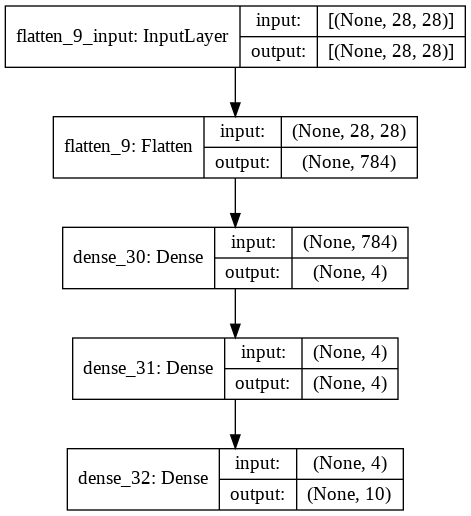

In [65]:
#modelimize son kez dah sekil sukul sekilde bakalim
from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)